# Deep Learning
- What is Deep Learning?
    - It is one of the machine learning techniques that learns features directly from data.
    - It is a field that encompasses machine learning algorithms similar to artificial neural networks, convolutional neural networks, and recurrent neural networks, which can include one or more hidden layers.
- Why Deep Learning?
    - As the amount of data increases, traditional machine learning techniques become insufficient in terms of performance, and deep learning provides better results compared to traditional machine learning in terms of performance.
    
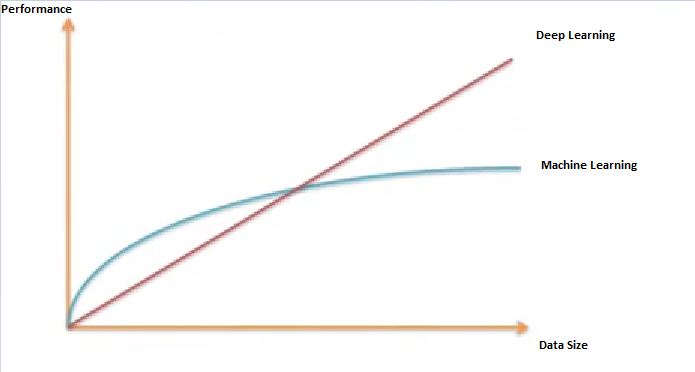

- What is a Large Amount?
    - It is difficult to answer, but intuitively, 1 million examples are sufficient to say "a large amount of data." With the advancement of computer hardware, even 1 million examples can be considered a small amount in the near future.
- Application Areas of Deep Learning
    - It is used in areas such as speech recognition, image classification, natural language processing, recommendation systems, object detection, object tracking, computer vision, and sentiment analysis.
- Differences Between Deep Learning and Machine Learning
    - Machine learning encompasses deep learning.
    - In machine learning, features are manually provided to the model, but deep learning models extract these features themselves.
    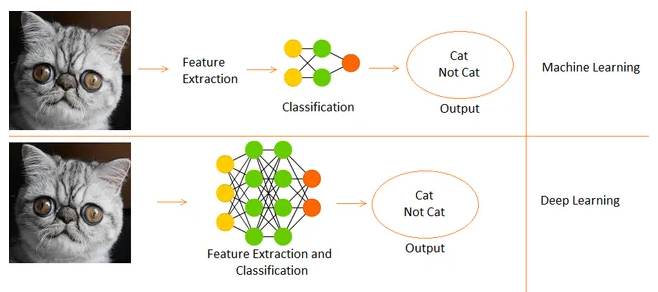

- Most Used Deep Learning Libraries
    - TensorFlow: Initially developed by researchers and engineers working on the Google Brain Team within Google's Machine Intelligence Research organization. The system is designed to facilitate research in machine learning and make the transition from research prototype to production system quick and easy.
    - Keras: A high-level neural networks API written in Python that can run on top of TensorFlow.

## Content:
## Artificial Neural Networks
- Introduction to the Dataset
- 2-Layer Neural Network
    - Initialization of Parameters
    - Forward Propagation
    - Loss and Cost Functions
    - Backward Propagation
    - Updating Parameters
    - Prediction
    - Creating a 2-Layer Neural Network
- N-Layer Neural Network
    - Artificial Neural Networks with the Keras Library
## Convolutional Neural Networks
- Introduction to the Dataset
- Normalization, Reshaping, and Label Encoding
- Splitting into Training and Test Sets
- Convolutional Neural Networks
    - What is the Convolution Operation?
    - Adding Pixels
    - Pooling
    - Flattening
    - Fully Connected Layer
- Convolutional Neural Networks with Keras
    - Model Creation
    - Defining the Optimizer
    - Compiling the Model
    - Number of Epochs and Batch Size
    - Data Augmentation
    - Training the Model
    - Evaluating the Model
## Recurrent Neural Networks
- Recurrent Neural Networks with Keras
    - Introduction to the Dataset
    - Model Creation
    - Prediction and Model Evaluation

## Artificial Neural Networks
- What is an Artificial Neural Network?
    - Artificial neural networks are an information processing technology developed by drawing inspiration from the information processing technique of the human brain.
    - Artificial neural networks model the working mechanism of the biological nervous system. In summary, they digitally model the synaptic connections between biological nerve cells and the connections these cells establish with each other.
    - Essentially, they are formed by taking the logistic regression model and repeating it at least twice in succession. The logistic regression model is a single-layer model, whereas neural networks consist of at least two layers.
    - In logistic regression, there are only input and output layers. However, in a neural network, there is at least one hidden layer between the input and output layers.
    - Artificial neural networks are also referred to as deep neural networks over time.
- How Deep is Deep?
    - "Deep" is a term that indicates how many hidden layers a network has.
    - It is a relative term.
    - 32 years ago, using one or two hidden layers was enough to call a network "deep" because the hardware of that time was limited. But just a few years ago, networks with 152 layers were considered deep. Nowadays, companies like Google and other large firms talk about networks with thousands of hidden layers.
- Why Hidden?
    - Hidden layers are not visible. Layers that see the inputs are called "input layers."
    - When expressing the number of layers, do not count the input layer. For example, consider a deep learning model with 1 input, 1 hidden, and 1 output layer. The answer to the question of how many layers it has is 2 (1 hidden + 1 output layer).
- Let's see and understand the working logic of a 2-layer neural network
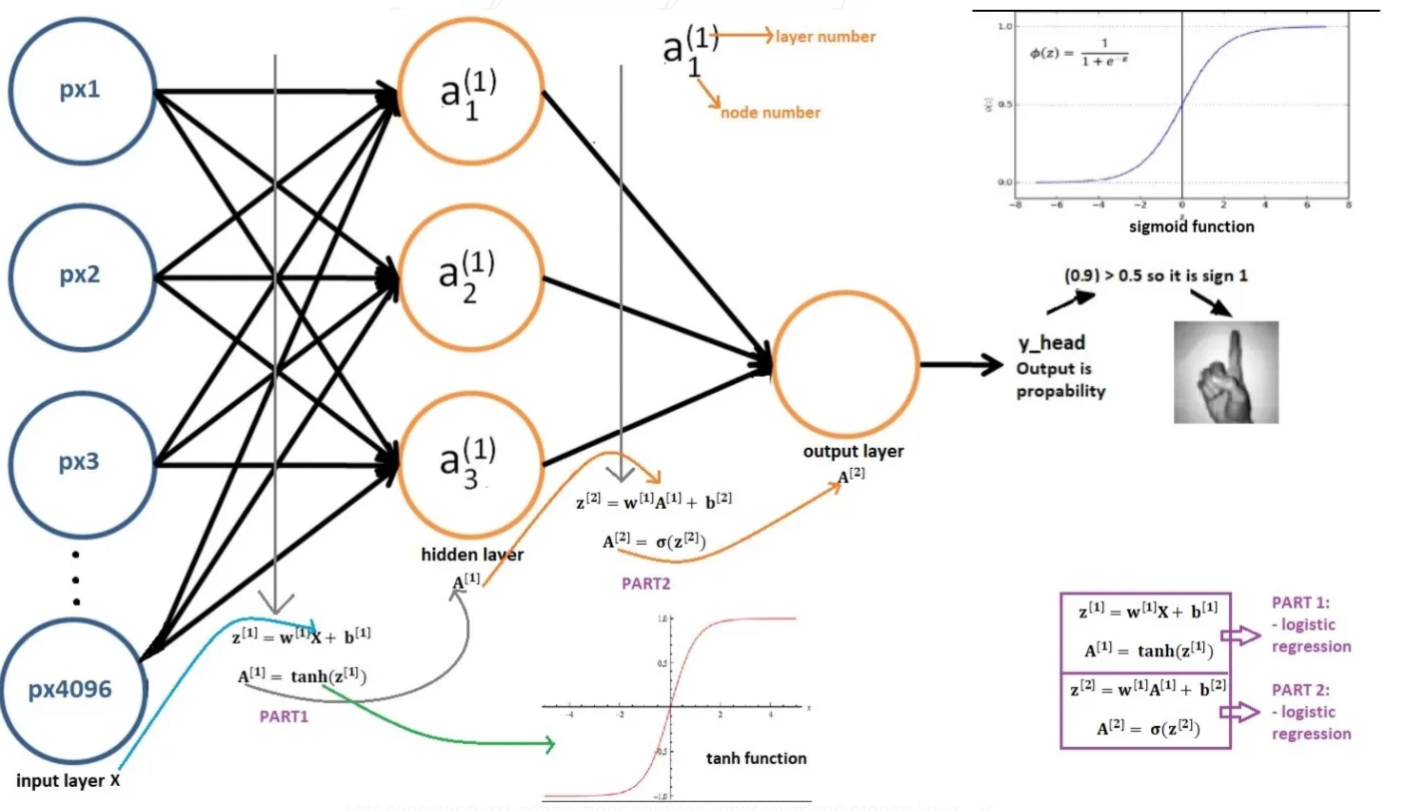

- Let's proceed step by step based on the figure above.
    - As you can see, there is a hidden layer (orange) between the input (blue) and output (orange) layers. This hidden layer has 3 nodes. If you are wondering why I chose 3 nodes, there is no specific reason. The number of nodes is a hyperparameter.
    - The input and output layers are similar to logistic regression. The output layer can have a different function instead of the sigmoid function, such as a linear or softmax function.
    - In the figure, there is a tanh function. The tanh activation function is similar to the sigmoid function. The tanh activation function is better for hidden units than the sigmoid function because its output is closer to zero on average, which centers the data better for the next layer. Additionally, the tanh activation function increases non-linearity, allowing the model to learn complex data sets better.
    - As you can see in purple, there are two sections. Both sections are similar to logistic regression. The only difference is the activation function, inputs, and outputs.
        - In logistic regression: input => output
        - In a 2-layer neural network: input => hidden layer => output. You can think of the hidden layer as having two parts: the output of the first part and the input of the second part.
    - Let's proceed together based on the figure.
        - The examples in the dataset enter the input layer. z1=W1X1+b1, A1=tanh(z1)
        - The outputs of the input layer enter the hidden layer.z2=W2A1+b2, A2=σ(z2)
        - The outputs of the hidden layer enter the output layer, and then loss and cost calculations are performed.
        - After finding the cost, the parameters are updated using the gradient descent algorithm.
        - This process is repeated until the parameters are learned (until the values stop changing or the cost approaches zero).

### Introduction to the Dataset
- We will use a dataset called MNIST.
- The MNIST database is a large database formed by the handwritten digits, commonly used to train various image processing systems.
- As you know, digits range from 0 to 9, so there are 10 unique symbols.
- In artificial neural networks, we will use only the symbols/classes 0 and 1. When we move on to convolutional neural networks, we will use all 10 classes.
- The training dataset contains 42,000 images.
- The images are composed of 28x28 pixels.

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Suppress unnecessary warnings
import warnings
warnings.filterwarnings('ignore')

# We will use Keras for deep learning, but sklearn will help us split the data into training and test sets
from sklearn.model_selection import train_test_split

In [2]:
# the relevant folder where the data is located
os.chdir('C:/Users/ST27/Desktop/EDU/DS/BootCamp/1. Data sources/AEY')

data = pd.read_csv('training.csv')
print(f'Data Size : {data.shape}')
data.head()

Data Size : (42000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
# Let's take only the samples with labels zero and one
label_filter0 = 0  # Label zero
label_filter1 = 1  # Label one

# Combine the samples with labels zero and one using filtering
data = pd.concat([data[data["label"] == label_filter0], data[data["label"] == label_filter1]], axis = 0)

data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# Separate the labels
Y_data = data["label"]

# Create the training dataset
X_data = data.drop(["label"], axis=1)
print("X data: ", X_data.shape)
print("Y data: ", Y_data.shape)

X data:  (8816, 784)
Y data:  (8816,)


Explanation:

The shape of X is 8816, 784
- There are 8816 samples
- 784 means the pixels are flattened from 28x28

The shape of Y is 8816, 1
- There are 8816 samples (0 and 1 classes)

In [5]:
# We will use the image size
image_size = int(np.sqrt(X_data.shape[1]))
image_size

28

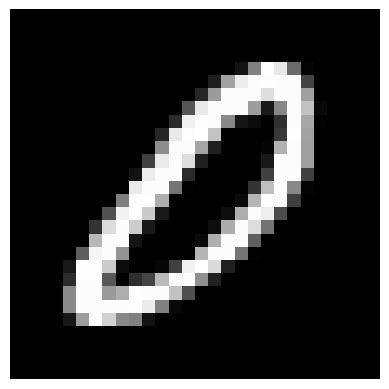

In [6]:
# Let's visualize the data (class 0)
image1 = X_data.iloc[900].values
image1 = image1.reshape(image_size, image_size)
plt.imshow(image1, cmap='gray')
plt.axis('off')
plt.show()

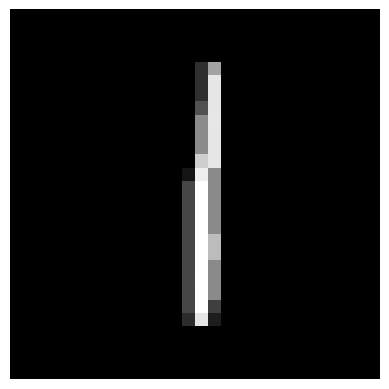

In [7]:
# Let's visualize the data (class 1)
image2 = X_data.iloc[8000].values
image2 = image2.reshape(image_size, image_size)
plt.imshow(image2, cmap='gray')
plt.axis('off')
plt.show()

- Translation and Code
- We have visualized the data belonging to the zero and one classes in the dataset.
- Now, let's split our dataset into training and test sets with a ratio of 15% for the test set and 85% for the training set.

In [8]:
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_data, Y_data, test_size=0.15, random_state=42)
print("X train: ", X_train.shape)
print("X test: ", X_test.shape)

X train:  (7493, 784)
X test:  (1323, 784)


Explanation:

- Our training dataset contains 7493 samples.
- Our test dataset contains 1323 samples.

Let's perform the transpose operation to organize the inputs.

In [9]:
# Transpose the training and test sets
X_train = X_train.T
X_test = X_test.T

# Reshape the labels
y_train = y_train.values.reshape(1, -1)
y_test = y_test.values.reshape(1, -1)

# Print the shapes of the transposed and reshaped datasets
print("X train: ", X_train.shape)
print("X test: ", X_test.shape)
print("y train: ", y_train.shape)
print("y test: ", y_test.shape)

X train:  (784, 7493)
X test:  (784, 1323)
y train:  (1, 7493)
y test:  (1, 1323)


- Up to this point, we have selected our classes (0 and 1).
- We have created our training and test datasets.

### 2-Layer Neural Network
- Initialization of Parameters
- Forward Propagation
- Loss and Cost Functions
- Backward Propagation
- Updating Parameters
- Prediction
- Creating a 2-Layer Neural Network

**Initialization of Parameters**
- For the X training dataset:
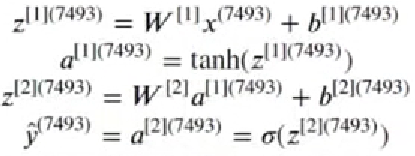
- In logistic regression, we initialized with weights of 0.01 and a bias of 0. This time, we will randomly initialize the weights. If we set the parameters to zero, each neuron in the hidden layer will perform the same computation. Therefore, even after multiple iterations of gradient descent, each neuron in the layer will calculate the same parameters as the other neurons. Hence, we start with random initialization.
- Additionally, we choose the initially initialized weights to be close to zero. If we select very large values initially, this will cause the tanh inputs to be very large and thus the gradients to be close to zero. As a result, the optimization algorithm will be slow.
- The bias can be zero initially.

In [10]:
# Initialization
def initialize_parameters(X_train, Y_train):
    parameters = {
        "weight1": np.random.randn(3, X_train.shape[0]) * 0.1,
        "bias1": np.zeros((3, 1)),
        "weight2": np.random.randn(Y_train.shape[0], 3) * 0.1,
        "bias2": np.zeros((Y_train.shape[0], 1))
    }
    return parameters

# Sigmoid Function
def sigmoid(z):
    y_head = 1 / (1 + np.exp(-z))
    return y_head

# Example usage
sigmoid(0)

0.5

**Forward Propagation**
- Forward propagation is almost the same as in logistic regression.
- The only difference is that we use the tanh function and perform all operations twice.
- Additionally, the Numpy library has a tanh function. Therefore, we do not need to define a tanh function like the sigmoid function.

In [11]:
def forward_propagation_nn(X_train, parameters):
    Z1 = np.dot(parameters["weight1"], X_train) + parameters["bias1"]
    A1 = np.tanh(Z1)
    Z2 = np.dot(parameters["weight2"], A1) + parameters["bias2"]
    A2 = sigmoid(Z2)
    
    cache = {
        "Z1": Z1,
        "A1": A1,
        "Z2": Z2,
        "A2": A2
    }
    
    return A2, cache

**Loss and Cost Functions**
- The loss and cost functions are the same as in logistic regression.
- Cross-entropy function:
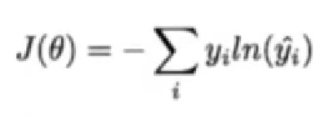

In [12]:
# Cost calculation
def compute_cost_nn(A2, Y, parameters):
    logprobs = np.multiply(np.log(A2), Y)
    cost = -np.sum(logprobs) / Y.shape[1]
    return cost

**Backward Propagation**
- As you know from logistic regression, in the backward propagation section, we find the derivative of the cost with respect to the parameters.

In [13]:
# Backward Propagation
def backward_propagation_nn(parameters, cache, X, Y):
    m = X.shape[1]
    
    dZ2 = cache["A2"] - Y
    dW2 = np.dot(dZ2, cache["A1"].T) / m
    db2 = np.sum(dZ2, axis=1, keepdims=True) / m
    
    dZ1 = np.dot(parameters["weight2"].T, dZ2) * (1 - np.power(cache["A1"], 2))
    dW1 = np.dot(dZ1, X.T) / m
    db1 = np.sum(dZ1, axis=1, keepdims=True) / m
    
    grads = {
        "dweight1": dW1,
        "dbias1": db1,
        "dweight2": dW2,
        "dbias2": db2
    }
    
    return grads

**Updating Parameters**
- Let's update our weight and bias parameters.

In [14]:
# Update parameters
def update_parameters_nn(parameters, grads, learning_rate=0.01):
    parameters = {
        "weight1": parameters["weight1"] - learning_rate * grads["dweight1"],
        "bias1": parameters["bias1"] - learning_rate * grads["dbias1"],
        "weight2": parameters["weight2"] - learning_rate * grads["dweight2"],
        "bias2": parameters["bias2"] - learning_rate * grads["dbias2"]
    }
    
    return parameters

**Prediction**
- Let's perform the prediction operation.

In [15]:
# Prediction
def predict_nn(parameters, X_test):
    # X_test is the input for forward propagation
    A2, cache = forward_propagation_nn(X_test, parameters)
    Y_prediction = np.zeros((1, X_test.shape[1]))
    
    # If z is greater than 0.5, classify as 1
    # If z is less than or equal to 0.5, classify as 0
    for i in range(A2.shape[1]):
        if A2[0, i] <= 0.5:
            Y_prediction[0, i] = 0
        else:
            Y_prediction[0, i] = 1
    
    return Y_prediction

**2-Layer Neural Network**
- Let's combine the functions we have written so far.

Iteration: 0, Cost: 0.3486934281324075
Iteration: 100, Cost: 0.20082551279068825
Iteration: 200, Cost: 0.12075595127302373
Iteration: 300, Cost: 0.08589369088007605
Iteration: 400, Cost: 0.06914119726881623
Iteration: 500, Cost: 0.05946749759250768
Iteration: 600, Cost: 0.05134035722476105
Iteration: 700, Cost: 0.04609631156040811
Iteration: 800, Cost: 0.042775370249698866
Iteration: 900, Cost: 0.04024767630364895


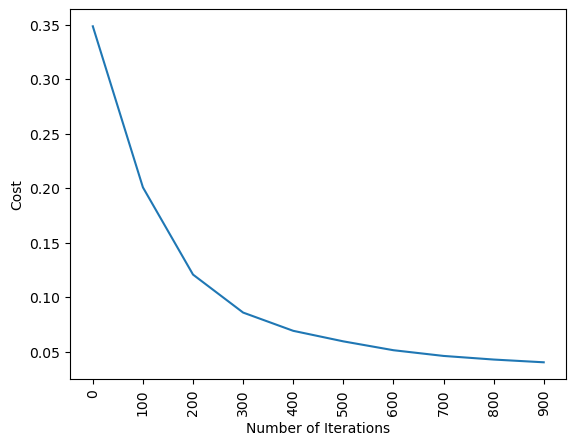

Train accuracy: 99.02575737354864%
Test accuracy: 99.01738473167045%


In [16]:
# 2-Layer Neural Network
def two_layer_nn(X_train, Y_train, X_test, Y_test, num_iterations, learning_rate=0.01):
    cost_list = []
    index_list = []
    
    # Initialization
    parameters = initialize_parameters(X_train, Y_train)
    
    for i in range(num_iterations):
        # Forward propagation
        A2, cache = forward_propagation_nn(X_train, parameters)
        
        # Compute cost
        cost = compute_cost_nn(A2, Y_train, parameters)
        
        # Backward propagation
        grads = backward_propagation_nn(parameters, cache, X_train, Y_train)
        
        # Update parameters
        parameters = update_parameters_nn(parameters, grads, learning_rate)
        
        # Store the cost every 100 iterations
        if i % 100 == 0:
            cost_list.append(cost)
            index_list.append(i)
            print(f"Iteration: {i}, Cost: {cost}")
    
    # Plot the cost
    plt.plot(index_list, cost_list)
    plt.xticks(index_list, rotation='vertical')
    plt.xlabel("Number of Iterations")
    plt.ylabel("Cost")
    plt.show()
    
    # Predictions
    Y_prediction_train = predict_nn(parameters, X_train)
    Y_prediction_test = predict_nn(parameters, X_test)
    
    # Print train/test accuracy
    print(f"Train accuracy: {100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100}%")
    print(f"Test accuracy: {100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100}%")
    
    return parameters
parameters = two_layer_nn(X_train, y_train, X_test, y_test, num_iterations = 1000)

- Our training and test accuracy is 98%. This means we correctly predict 98% of the images in the test and training data.
- Up to this point, we have learned the following concepts for 2-layer neural networks:
    - Initialization of Parameters
    - Forward Propagation
    - Loss and Cost Functions
    - Backward Propagation
    - Updating Parameters
    - Prediction
    - Creating a 2-Layer Neural Network
- Now, we will learn how to create N-layer neural networks using the Keras library. All the concepts we have learned above are exactly the same.

**N-Layer Neural Network**
- What Happens If the Number of Hidden Layers Increases?
    - Layers closer to the input layer can detect simple features.
    - Layers closer to the output layer can learn more complex functions.
    - For example, the first hidden layer learns basic shapes like edges and lines. As the number of layers increases, the layers start to learn more complex features like convex shapes or characteristic features.
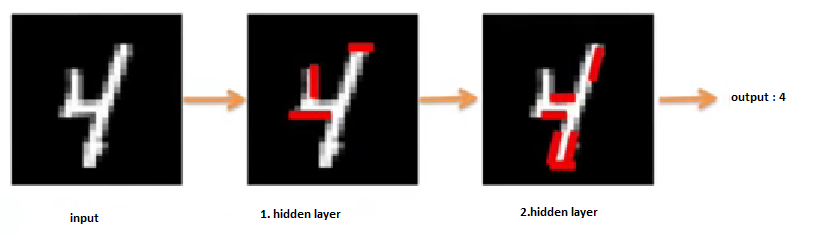

- Let's Create Our Model
    - There are some hyperparameters we need to choose, such as learning rate, number of iterations, number of hidden layers, number of neurons in hidden layers, and activation function.
    - You can choose these hyperparameters by reviewing previous publications, through trial and error, or intuitively if you spend a lot of time in the world of deep learning.
    - In this tutorial, our model will have 2 hidden layers with 8 and 4 nodes, respectively. This is because increasing the number of hidden layers and nodes makes the model more complex, which can take a long time to train and may exceed our hardware capabilities.
    - We will use the relu activation function for the first and second hidden layers, and the sigmoid activation function for the output layer.
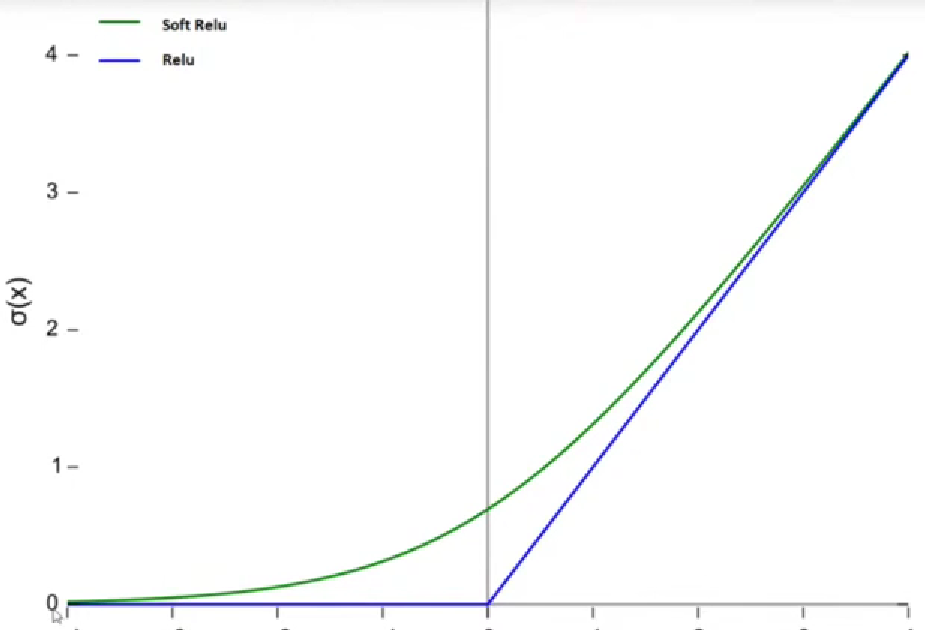
    - The number of iterations will be 100.
- This time, instead of writing our code step by step, we will take advantage of the power of the Keras library, which runs on TensorFlow.
- Let's reshape our dataset to fit the format required by the Keras library.

In [17]:
X_train, y_train, X_test, y_test = X_train.T, y_train.T, X_test.T, y_test.T

**Artificial Neural Networks with the Keras Library**
Let's look at some parameters of the Keras library:

* units: number of neurons
* kernel_initializer: weight initialization
* activation: activation function
* input_dim: input dimension, which is the number of pixels in our example (784)
* optimizer: we will use the Adam optimization method.
    * Adam is one of the most effective optimization algorithms for training neural networks.
    * Some advantages of Adam include relatively low memory requirements and generally good performance even with little hyperparameter tuning.
* loss: we will use the cross-entropy cost function.
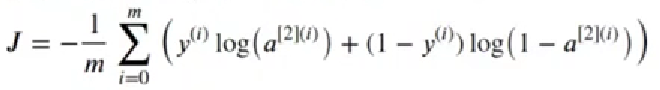
* metrics: we will use accuracy as the metric.
* cross_val_score: we will use cross-validation.
* epochs: number of iterations.

In [ ]:
# Import necessary libraries
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from keras.models import Sequential  # initialize neural network library
from keras.layers import Dense  # build our layers library

# Define a method for our model
def classifierMethod():
    classifier = Sequential()  # initialize neural network
    
    # Add layers to the model
    classifier.add(Dense(units=8, kernel_initializer='uniform', activation='relu', input_dim=X_train.shape[1]))
    classifier.add(Dense(units=4, kernel_initializer='uniform', activation='relu'))
    classifier.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))
    
    # Compile the model
    classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    
    return classifier
classifier = KerasClassifier(build_fn = classifierMethod,epochs = 5)
accuracy = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=3)# 3-fold cross-validation

mean = accuracy.mean()
variance = accuracy.std()
print(f'Accuracy mean: {str(mean)}')
print(f'Variance of accuracy: {str(variance)}')

## Convolutional Neural Networks

In [3]:
Y_data = data['label']

X_data = data.drop(['label'], axis = 1)
print(f'X data : {X_data.shape}')
print(f'Y data : {Y_data.shape}')

X data : (42000, 784)
Y data : (42000,)


In [4]:
# Check data type
print(type(Y_data))

# Check for NaN values
print(Y_data.isna().sum())

# Check unique values
print(Y_data.unique())

<class 'pandas.core.series.Series'>
0
[1 0 4 7 3 5 8 9 2 6]


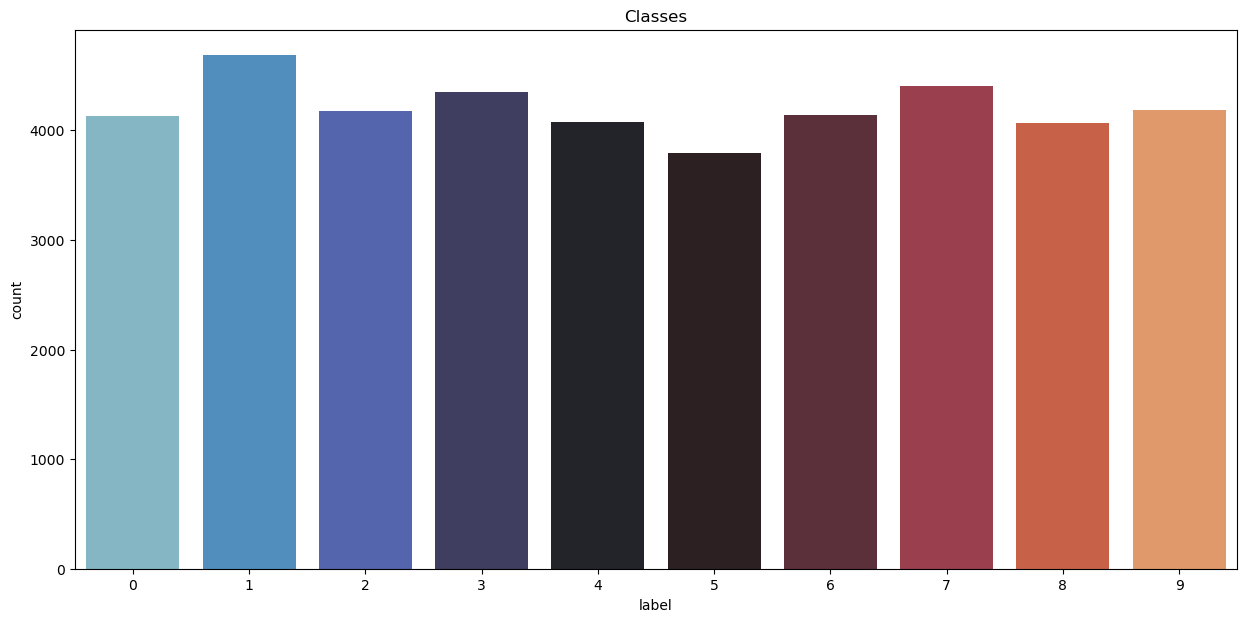

Classes and examples label
1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: count, dtype: int64


In [5]:
plt.figure(figsize = (15,7))
g = sns.countplot(x = Y_data, palette = 'icefire')
plt.title('Classes')
plt.show()
print(f'Classes and examples {Y_data.value_counts()}')

In [6]:
image_height = int(np.sqrt(X_data.shape[1]))
image_height

28

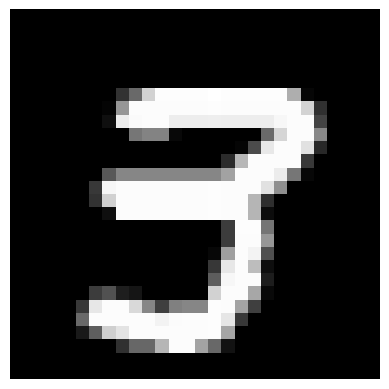

In [7]:
# Visualize our data - 3 classes
image = X_data.iloc[2000].values
image = image.reshape((image_height, image_height))
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.show()

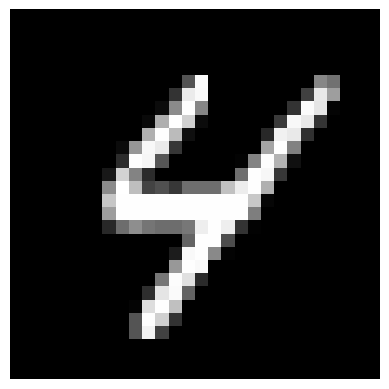

In [8]:
# Visualize our data - 4 classes
image2 = X_data.iloc[19000].values
image2 = image2.reshape((image_height, image_height))
plt.imshow(image2, cmap='gray')
plt.axis('off')
plt.show()

### Normalization, Reshaping, and Label Encoding
- Normalization
    - We normalize to reduce the effect of lighting differences by converting to grayscale.
    - Normalizing makes our model run faster.
- Reshaping
    - We reshape all data into 28x28x1 matrices. This is because Keras accepts input data as 3D.
    - Keras requires an extra dimension corresponding to the channels. Since our images are grayscale, we use only one channel.
- Label Encoding
    - Let's encode the labels as single vectors:
        - 2 => [0,0,1,0,0,0,0,0,0,0]
        - 4 => [0,0,0,0,1,0,0,0,0,0]

In [9]:
# Normalize the data
X_data = X_data / 255.0

# Reshape
X_data = X_data.values.reshape(-1, 28, 28, 1)
print("X training size:", X_data.shape)

# X training size output: (42000, 28, 28, 1)

# Label encoding
from keras.utils.np_utils import to_categorical  # for vector conversion
Y_data = to_categorical(Y_data, num_classes=10)

X training size: (42000, 28, 28, 1)


### Split the train and the validation set for the fitting

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y_data, test_size=0.1, random_state=2)

print("X training size:", X_train.shape)
print("X test size:", X_test.shape)
print("Y training size:", Y_train.shape)
print("Y test size:", Y_test.shape)


X training size: (37800, 28, 28, 1)
X test size: (4200, 28, 28, 1)
Y training size: (37800, 10)
Y test size: (4200, 10)


### CNN
- Convolutional neural networks are specialized networks designed to solve classification and object detection problems on images.
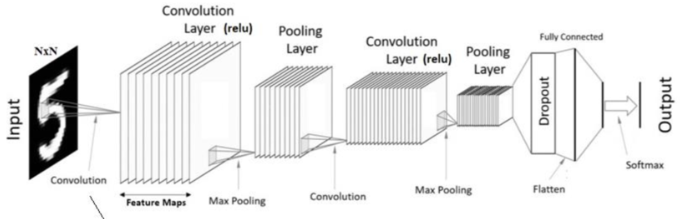

**What is a Convolution Operation?**

- First, let's have an image and our feature detector (3 3).
- The feature detector must be a 3x3 matrix. It can also be 5x5 or 7x7.
- The feature detector is also called a kernel or filter.
- The feature detector detects features such as edges and shapes. For example, if our image is a dog, the feature detector can detect features like the dog's ear or tail.
- The feature map = convolution (input image, feature detector). It is the multiplication of the elements in the matrices.
- It is performed on the image.
- As a result of these operations, the size of the original image is reduced, which is beneficial for the fast operation of our model.
- We create more than one feature map because we use more than one feature detector (filter).
 
 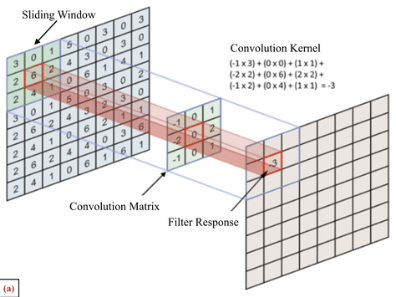.)ng)ng)filter).

**Padding**
- As we continue to apply convolution layers, the size of the image will decrease faster than we want.
- In the initial layers of our network, we want to preserve as much information as possible about the original input size to extract low-level features. Therefore, we use padding.
- As seen in the figure, the input and output sizes are the same. Stride = 1 means moving one pixel at a time.
 

 ![image.png](attachment:55a1cf48-6263-459f-b514-5c49fcd06909.png)

 


**Pooling**
- Performs downsampling or subsampling (reduces the number of parameters).
- Ensures the detection of features that do not change according to scale or direction changes.
- Reduces the number of parameters and computations in the next layer, thereby also controlling overfitting.
 
 ![image.png](attachment:dece5d37-bf53-44e0-a52d-193e3628ceb8.png)



**Flattening**
- Converts two-dimensional data into a vector.

 ![image.png](attachment:f14c9583-0f49-4fd0-b287-314cf7c8f3aa.png)

**Fully Connected**
- The neurons in one layer are connected to all activations in the previous layer. For example, artificial neural networks.

### Convolutional Neural Networks with Keras**
Model Creatio**n- 
The layers in the model we will create with the Keras library will be as follows    - :
conv => max pool => dropout => conv => max pool => dropout => fully connected (2 layer- s)
Dropout: A technique where randomly selected neurons are ignored during training. It prevents overfitting.

In [12]:
# Let's load the libraries
from sklearn.metrics import confusion_matrix
import itertools
from keras.utils.np_utils import to_categorical  # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop, Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

model = Sequential()
#
model.add(Conv2D(filters=8, kernel_size=(5, 5), padding='Same', 
                 activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
#
model.add(Conv2D(filters=16, kernel_size=(3, 3), padding='Same', 
                 activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.25))
#
# Fully connected
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

**Specifying the Optimizer**- 
We will use the Adam optimization method.

In [13]:
optimizer = Adam(lr =0.001, beta_1 = 0.9, beta_2 = 0.999)

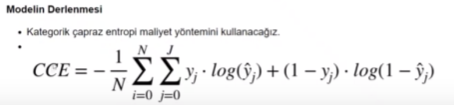

In [15]:
# Let's compile the model
model.compile(optimizer=optimizer, 
              loss="categorical_crossentropy", metrics=["accuracy"])

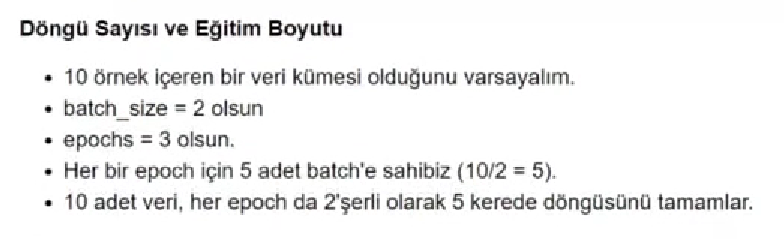

In [17]:
epochs = 10
batch_size = 250

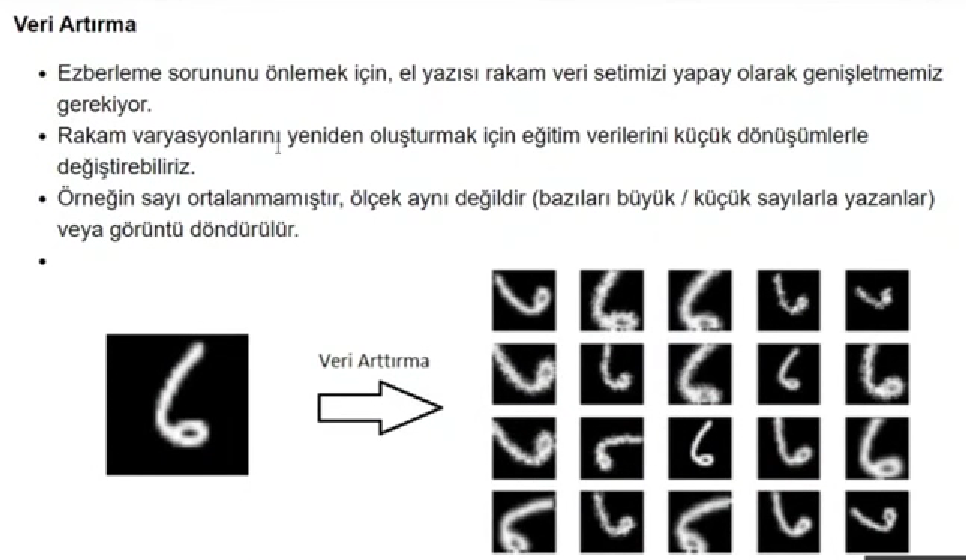

In [18]:
# data augmentation
datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=5,  # randomly rotate images in the range (degrees, 0 to 180)
    zoom_range=0.1,  # Randomly zoom image 
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=False,  # randomly flip images horizontally
    vertical_flip=False)  # randomly flip images vertically

datagen.fit(X_train)

In [19]:
# training the model
history = model.fit_generator(datagen.flow(X_train, Y_train, 
                                           batch_size=batch_size),
                              epochs=epochs,
                              validation_data=(X_test, Y_test),
                              steps_per_epoch=X_train.shape[0] // batch_size, 
                              verbose=2)

Epoch 1/10
151/151 - 18s - loss: 1.2038 - accuracy: 0.5955 - val_loss: 0.2471 - val_accuracy: 0.9352 - 18s/epoch - 119ms/step
Epoch 2/10
151/151 - 16s - loss: 0.4538 - accuracy: 0.8564 - val_loss: 0.1332 - val_accuracy: 0.9593 - 16s/epoch - 105ms/step
Epoch 3/10
151/151 - 15s - loss: 0.3273 - accuracy: 0.8975 - val_loss: 0.1091 - val_accuracy: 0.9657 - 15s/epoch - 99ms/step
Epoch 4/10
151/151 - 16s - loss: 0.2680 - accuracy: 0.9144 - val_loss: 0.0863 - val_accuracy: 0.9695 - 16s/epoch - 108ms/step
Epoch 5/10
151/151 - 16s - loss: 0.2456 - accuracy: 0.9227 - val_loss: 0.0798 - val_accuracy: 0.9750 - 16s/epoch - 103ms/step
Epoch 6/10
151/151 - 15s - loss: 0.2173 - accuracy: 0.9328 - val_loss: 0.0699 - val_accuracy: 0.9793 - 15s/epoch - 97ms/step
Epoch 7/10
151/151 - 15s - loss: 0.2047 - accuracy: 0.9364 - val_loss: 0.0642 - val_accuracy: 0.9790 - 15s/epoch - 98ms/step
Epoch 8/10
151/151 - 15s - loss: 0.1825 - accuracy: 0.9426 - val_loss: 0.0630 - val_accuracy: 0.9814 - 15s/epoch - 98ms/s

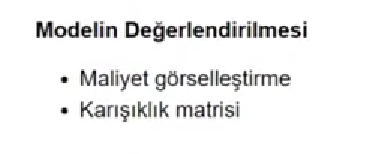


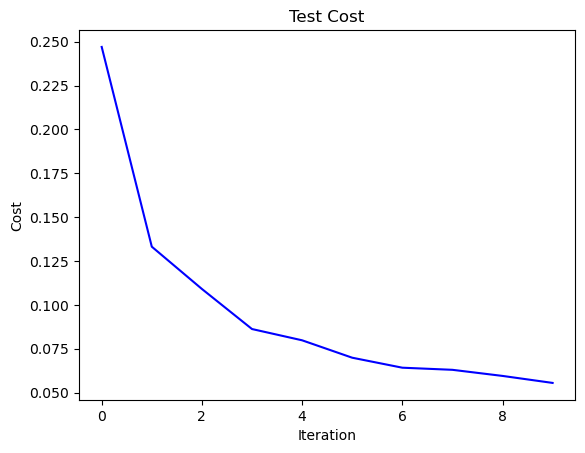

In [20]:
# Cost visualization
plt.plot(history.history['val_loss'], color='b')
plt.title("Test Cost")
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.show()

132/132 [==============================] - 1s 5ms/step


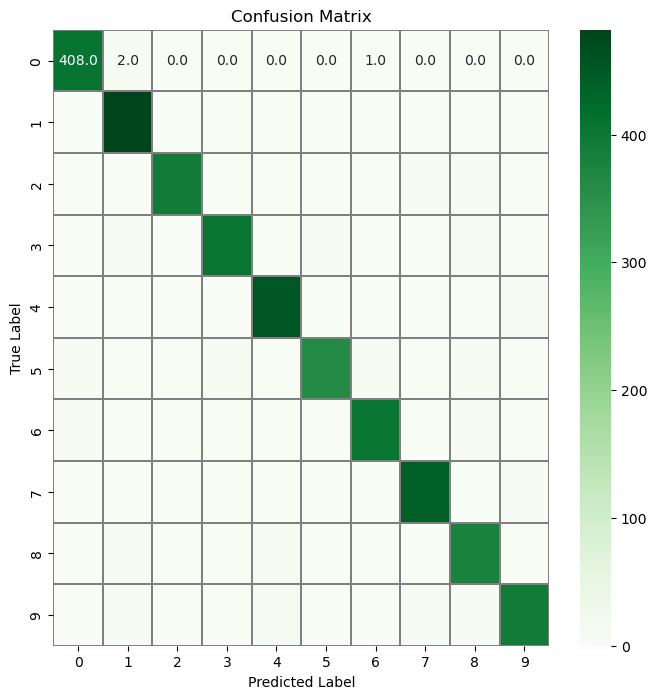

In [23]:
# predict from the test set
Y_pred = model.predict(X_test)

# convert the predicted data
Y_pred_classes = np.argmax(Y_pred, axis=1)

# convert the test data
Y_true = np.argmax(Y_test, axis=1)

# calculate the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)

# plot the confusion matrix
f, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01, 
            cmap="Greens", linecolor="gray", fmt='.1f', ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

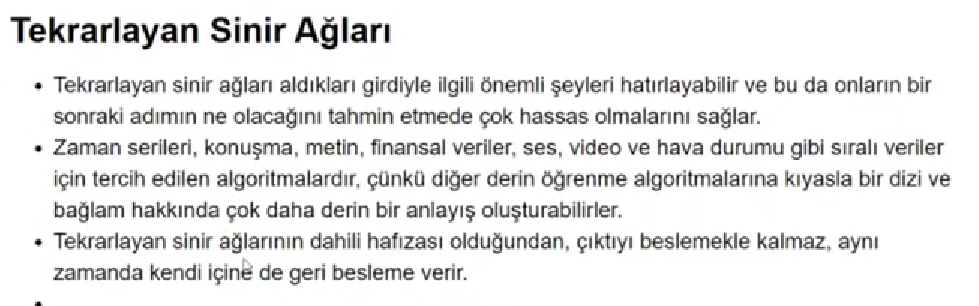


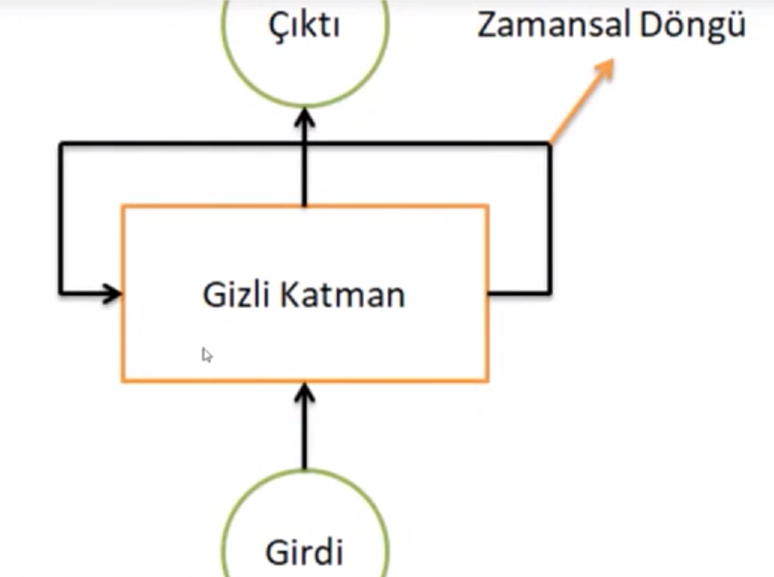

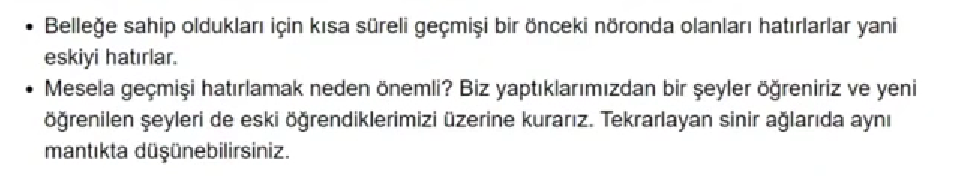

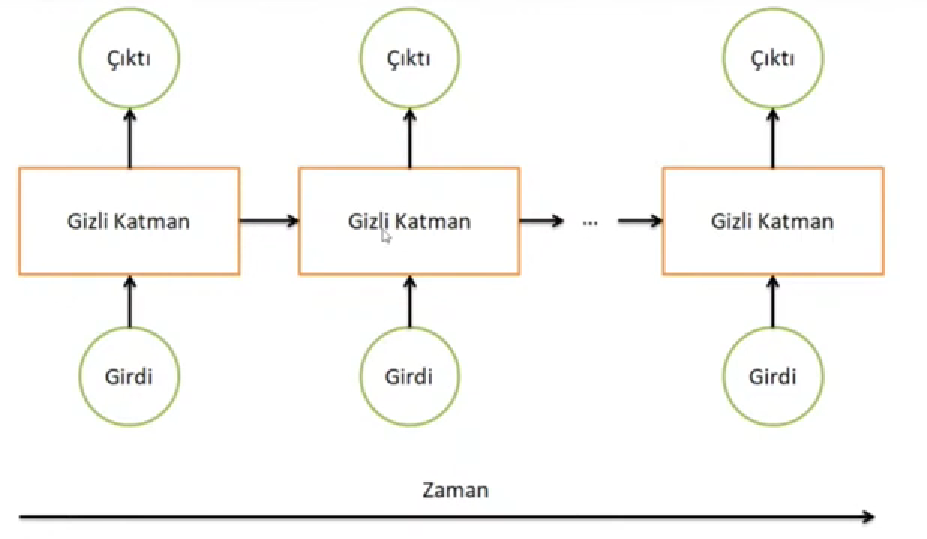

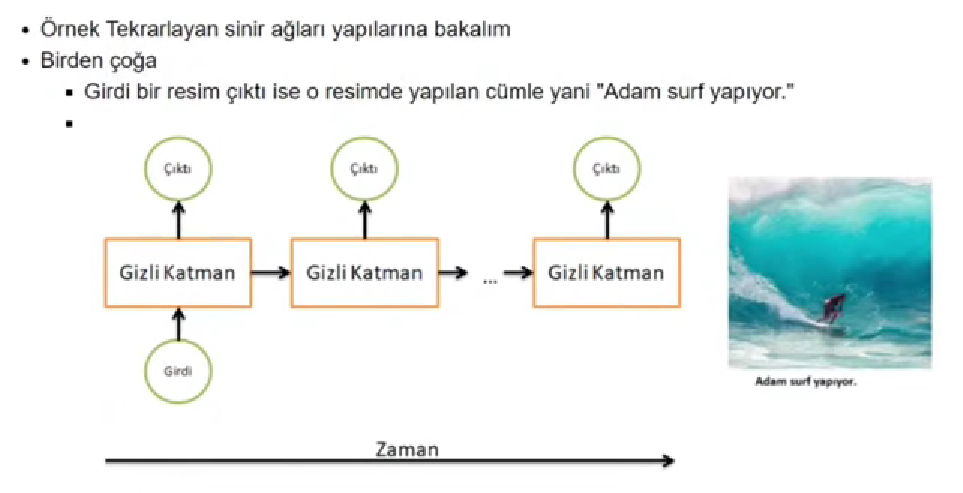

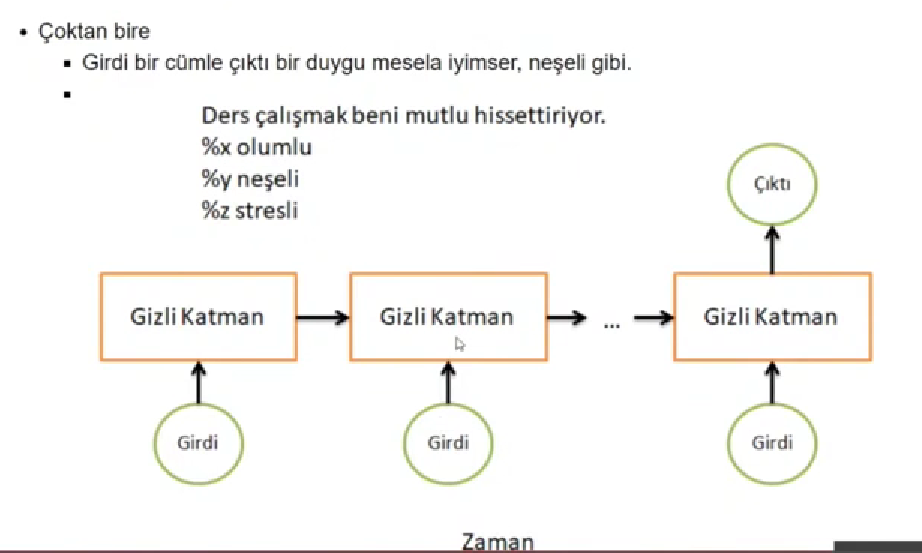

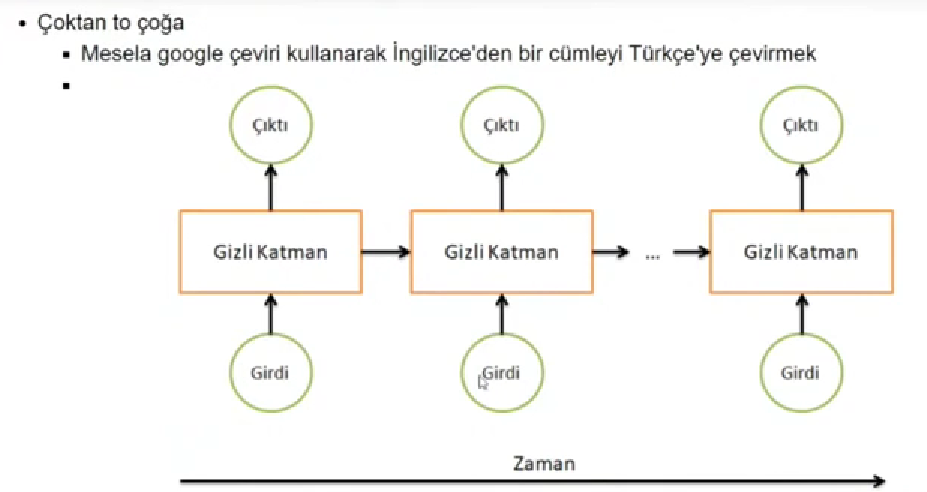

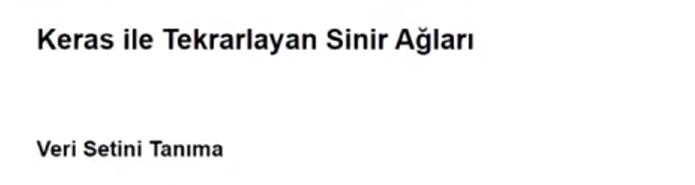

In [35]:
data = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv')
data.head()

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


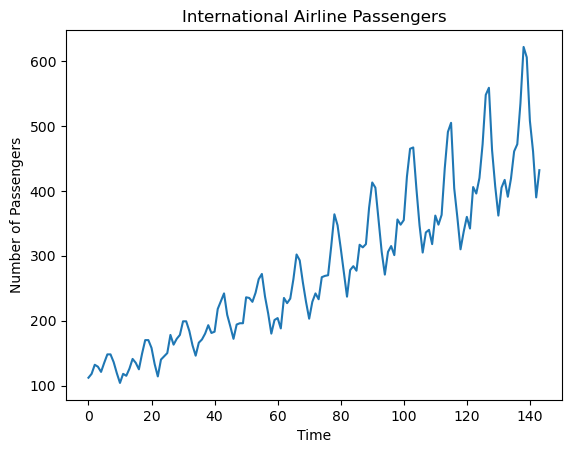

In [37]:
# visualize the data
data = data.iloc[:, 1].values
plt.plot(data)
plt.xlabel("Time")
plt.ylabel("Number of Passengers")
plt.title("International Airline Passengers")
plt.show()

In [38]:
# change the shape and type of the data
data = data.reshape(-1, 1)
data = data.astype("float32")
data.shape

# let's normalize
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)
data_scaled[:4]

array([[0.01544401],
       [0.02702703],
       [0.05405405],
       [0.04826255]], dtype=float32)

In [39]:
# split the data into training and test sets,
# let 60% of the data be training data and the rest be test data
train_size = int(len(data) * 0.60)
test_size = len(data) - train_size
train = data_scaled[:train_size, :]
test = data_scaled[train_size:len(data), :]
print("Train size: {}, Test size: {}".format(len(train), len(test)))

Train size: 86, Test size: 58


In [40]:
# Reshape the training data into sequences of 10
time_step = 10
dataX = []
dataY = []

for i in range(len(train) - time_step - 1):
    a = train[i:(i + time_step), 0]
    dataX.append(a)
    dataY.append(train[i + time_step, 0])

trainX = np.array(dataX)
trainY = np.array(dataY)

In [41]:
# Reshape the test data into sequences of 10
dataX = []
dataY = []

for i in range(len(test) - time_step - 1):
    a = test[i:(i + time_step), 0]
    dataX.append(a)
    dataY.append(test[i + time_step, 0])

testX = np.array(dataX)
testY = np.array(dataY)

In [42]:
# Reshape the data to be suitable for Keras
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))

print("Train X shape: ", trainX.shape)
print("Test X shape: ", testX.shape)

Train X shape:  (75, 10, 1)
Test X shape:  (47, 10, 1)


**Create RNN MODEL**

In [43]:
# Import necessary methods from the Keras library
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Dropout

# Initialize the RNN
regressor = Sequential()

# First RNN layer and Dropout layer
regressor.add(SimpleRNN(units=120, activation='relu', 
                        return_sequences=True, 
                        input_shape=(trainX.shape[1], 1)))
regressor.add(Dropout(0.2))

# Second RNN layer and Dropout layer
regressor.add(SimpleRNN(units=80, activation='relu', 
                        return_sequences=True))
regressor.add(Dropout(0.2))
# Third RNN layer and Dropout layer
regressor.add(SimpleRNN(units=40, activation='relu', 
                        return_sequences=True))
regressor.add(Dropout(0.2))

# Fourth RNN layer and Dropout layer
regressor.add(SimpleRNN(units=20, activation='relu', 
                        return_sequences=True))
regressor.add(Dropout(0.2))

# Fifth RNN layer and Dropout layer
regressor.add(SimpleRNN(units=10))
regressor.add(Dropout(0.2))

# Output layer
regressor.add(Dense(units=1))

# Compile the RNN
regressor.compile(optimizer='adam', loss='mean_squared_error')
# Start training
regressor.fit(trainX, trainY, epochs=250, batch_size=50, verbose=0)

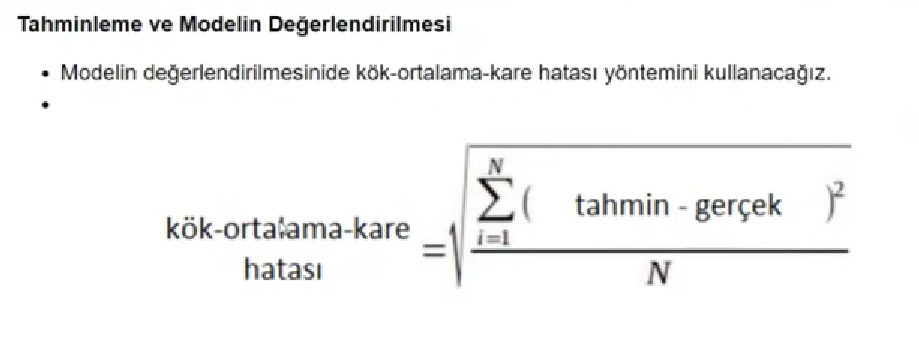

In [44]:
# Import necessary libraries
import math
from sklearn.metrics import mean_squared_error

trainPredict = regressor.predict(trainX)
testPredict = regressor.predict(testX)

# Convert predictions back to original scale
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

2/2 [==============================] - 0s 8ms/step


In [45]:
# Calculate Root Mean Squared Error (RMSE)
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:, 0]))
print('Train Score: %.2f RMSE' % (trainScore))

testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:, 0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 18.78 RMSE
Test Score: 61.80 RMSE


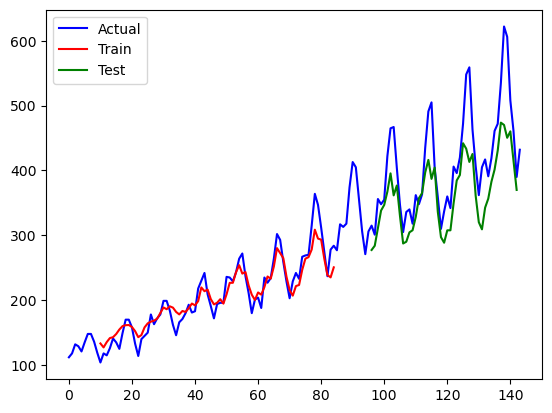

In [46]:
# Shift train predictions for plotting
trainPredictPlot = np.empty_like(data)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[time_step:len(trainPredict) + time_step, :] = trainPredict

# Shift test predictions for plotting
testPredictPlot = np.empty_like(data)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict) + (time_step * 2) + 1:len(data) - 1, :] = testPredict

# Plot baseline and predictions
plt.plot(scaler.inverse_transform(data_scaled), color='b', label='Actual')
plt.plot(trainPredictPlot, color='r', label='Train')
plt.plot(testPredictPlot, color='g', label='Test')
plt.legend()
plt.show()